In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_helper import accuracy_plot, relation_plot

version = 'v20251209'
targets = ['SOCconc', 'CF', 'BD', 'SOCdensity']
models = ['UniNN','MultiNN','SiNN']

df = pd.read_parquet(f'./eval/all_cv.pred_with.lc_{version}.pq')

# # read in
# uni = pd.read_csv(f'./eval/01_uniNN_tc_{version}.csv')
# print("UniNN:", uni.shape)
# mlt = pd.read_csv(f'./eval/02_multiNN_tc_{version}.csv')
# print("MultiNN:", mlt.shape)
# hbd = pd.read_csv(f'./eval/03_hybridNN_tc_{version}.csv')
# print("HybridNN:", hbd.shape)

# # rename relevant cols
# name_map = {"ndvi_glad_landast_ard2_seasconv_m_yearly_p50_30m_s_YYYY0101_YYYY1231_eu_epsg_3035_v20231127":"ndvi",
#             "ndwi_gao_glad_landsat_ard2_seasconv_m_yearly_p50_30m_s_YYYY0101_YYYY1231_eu_epsg_3035_v20231218":"ndwi",
#             "clm_lst_mod11a2_nighttime_p50_1km_s0_0cm_YYYY_v1_2":"lst_night",
#             "clm_lst_mod11a2_daytime_p50_1km_s0_0cm_YYYY_v1_2":"lst_day",
#             "clm_accum_precipitation_chelsa_annual_m_1km_s0_0cm_YYYY_v2_1":"precipitation",
#             "peatland_extent_wri_gfw_peatgrids_p_1km_s_2000_2020_go_epsg4326_v20241017":"peat"}
# mlt = mlt.rename(columns=name_map)

# # get and rename pred cols
# uni = uni[['row_id','pred_BD', 'pred_SOCconc','pred_CF', 'pred_SOCdensity']]
# iid = models[0]
# kmap = {}
# for pp in ['pred_BD', 'pred_SOCconc', 'pred_CF', 'pred_SOCdensity']:
#     kmap[pp] = pp.replace('pred',iid)
# uni = uni.rename(columns=kmap)

# mlt = mlt[['row_id', 'time', 'lat', 'lon', 'id', 'nuts0', 'maxdiff', 
#        'bd','clay', 'sand', 'silt', 'cf', 'ocd', 'soc',
#        'SOCconc', 'CF', 'BD', 'SOCdensity', 
#        'pred_BD', 'pred_SOCconc', 'pred_CF', 'pred_SOCdensity', 
#        'ndvi','ndwi','lst_night','lst_day','precipitation','peat']]
# iid = models[1]
# kmap = {}
# for pp in ['pred_BD', 'pred_SOCconc', 'pred_CF', 'pred_SOCdensity']:
#     kmap[pp] = pp.replace('pred',iid)
# mlt = mlt.rename(columns=kmap)

# hbd = hbd[['row_id','pred_BD', 'pred_SOCconc','pred_CF', 'pred_SOCdensity', 'pred_oBD', 'pred_mBD']]
# iid = models[2]
# kmap = {}
# for pp in ['pred_BD', 'pred_SOCconc', 'pred_CF', 'pred_SOCdensity']:
#     kmap[pp] = pp.replace('pred',iid)
# hbd = hbd.rename(columns=kmap)


# # join prediction results
# df = mlt.merge(hbd, on="row_id", how="left")
# df = df.merge(uni, on="row_id", how="left")
# print(df.shape)

# # ### get land cover
# mm = []
# for tt in ['2009','2012','2015','2018']:
#     mmt = pd.read_csv(f'/home/xuemeng/work_xuemeng/soil-data/data_raw/EU/LUCAS_TOPSOIL/lucas_microdata/EU_{tt}_20200213.CSV')
#     mmt['time'] = int(tt)
#     mm.append(mmt[['POINT_ID', 'LC1', 'time']])
    
# mm = pd.concat(mm)
# mm['POINT_ID'] = pd.to_numeric(mm['POINT_ID'], errors='coerce')
# mm = mm.dropna(subset=['POINT_ID'])
# mm['POINT_ID'] = mm['POINT_ID'].astype(int)
# mm = mm.rename(columns={'POINT_ID': 'id'})
# merged = df.merge(mm, on=['id', 'time'], how='left')
# merged['LC_group'] = merged['LC1'].str[0]  # Extract first letter

# survey_dict = {
#     "A": "artificial",
#     "B": "cropland",
#     "C": "woodland",
#     "D": "shrubland",
#     "E": "grassland",
#     "F": "bareland", # bareland and lichen and mosses
#     "G": "wetland", # water areas
#     "H": "wetland",  # wetlands
# }

# # Map land cover codes to descriptions
# merged['LC_group'] = merged['LC_group'].map(survey_dict)

# print(merged.shape)
# merged.to_parquet(f'./eval/all_tc_with.lc_{version}.pq')

UniNN: (39374, 391)
MultiNN: (39374, 391)
HybridNN: (39374, 391)
(39374, 38)


/tmp/ipykernel_41062/946643091.py:64: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  mmt = pd.read_csv(f'/home/xuemeng/work_xuemeng/soil-data/data_raw/EU/LUCAS_TOPSOIL/lucas_microdata/EU_{tt}_20200213.CSV')
/tmp/ipykernel_41062/946643091.py:64: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  mmt = pd.read_csv(f'/home/xuemeng/work_xuemeng/soil-data/data_raw/EU/LUCAS_TOPSOIL/lucas_microdata/EU_{tt}_20200213.CSV')
/tmp/ipykernel_41062/946643091.py:64: DtypeWarning: Columns (0,21,28) have mixed types. Specify dtype option on import or set low_memory=False.
  mmt = pd.read_csv(f'/home/xuemeng/work_xuemeng/soil-data/data_raw/EU/LUCAS_TOPSOIL/lucas_microdata/EU_{tt}_20200213.CSV')
/tmp/ipykernel_41062/946643091.py:64: DtypeWarning: Columns (0,32) have mixed types. Specify dtype option on import or set low_memory=False.
  mmt = pd.read_csv(f'/home/xuemeng/work_xuemeng/soil-data/data_ra

(39374, 40)


In [3]:
df.columns

Index(['row_id', 'time', 'lat', 'lon', 'id', 'nuts0', 'maxdiff', 'bd', 'clay',
       'sand', 'silt', 'cf', 'ocd', 'soc', 'SOCconc', 'CF', 'BD', 'SOCdensity',
       'MultiNN_BD', 'MultiNN_SOCconc', 'MultiNN_CF', 'MultiNN_SOCdensity',
       'ndvi', 'ndwi', 'lst_night', 'lst_day', 'precipitation', 'peat',
       'SiNN_BD', 'SiNN_SOCconc', 'SiNN_CF', 'SiNN_SOCdensity', 'pred_oBD',
       'pred_mBD', 'UniNN_BD', 'UniNN_SOCconc', 'UniNN_CF',
       'UniNN_SOCdensity'],
      dtype='object')

/tmp/ipykernel_41062/1548967480.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


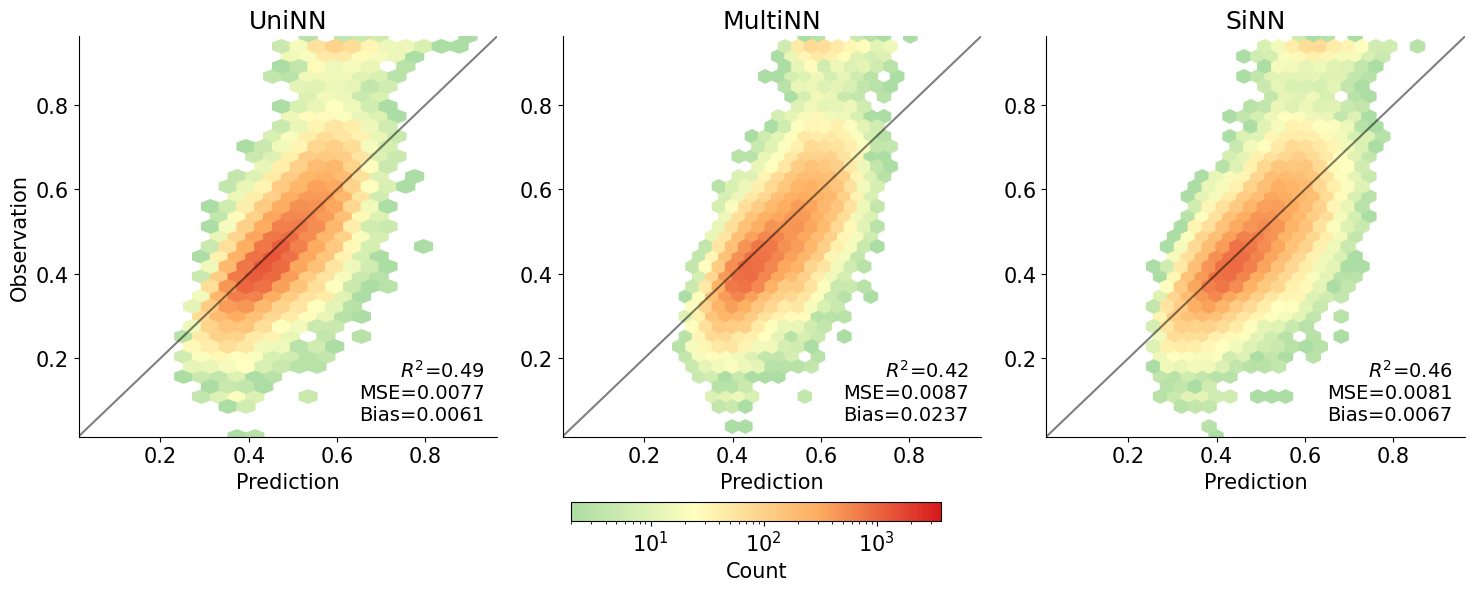

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

cet_l19_cmap = LinearSegmentedColormap.from_list(
    "CET-L19",
    ["#abdda4", "#ffffbf", "#fdae61", "#d7191c"]
)

plt.rcParams.update({'font.size': 15})
gridsize = (20, 20)

def compute_r2_mse(y_true, y_pred):
    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    y_t = y_true[mask]
    y_p = y_pred[mask]
    if y_t.size == 0:
        return np.nan, np.nan
    mse = np.mean((y_t - y_p)**2)
    denom = np.sum((y_t - y_t.mean())**2)
    r2 = np.nan if denom == 0 else 1 - np.sum((y_t - y_p)**2) / denom
    bias = np.mean(y_p - y_t)
    return r2, mse, bias


for tgt in ["SOCconc"]:

    # -------- Row-level normalization --------
    row_vals = []
    for mod in models:
        y_true = df[tgt].values
        y_pred = df[f"{mod}_{tgt}"].values
        mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
        row_vals.append(np.column_stack([y_pred[mask], y_true[mask]]))

    row_vals = np.vstack(row_vals)
    vmin = row_vals.min()
    vmax = row_vals.max()

    dummy_fig, dummy_ax = plt.subplots()
    hb_ref = dummy_ax.hexbin(
        row_vals[:, 0], row_vals[:, 1],
        gridsize=gridsize, bins="log", mincnt=2
    )
    row_count_vmax = hb_ref.get_array().max()
    plt.close(dummy_fig)

    # -------- Create a figure for this target --------
    fig, axes = plt.subplots(
        nrows=1,
        ncols=len(models),
        figsize=(15, 6),
        sharex=False,
        sharey=False
    )

    if len(models) == 1:
        axes = [axes]

    hbs = []

    for j, mod in enumerate(models):
        ax = axes[j]
        y_true = df[tgt].values
        y_pred = df[f"{mod}_{tgt}"].values
        mask = np.isfinite(y_true) & np.isfinite(y_pred)
        y_t = y_true[mask]
        y_p = y_pred[mask]

        hb = ax.hexbin(
            y_p, y_t,
            gridsize=gridsize,
            cmap=cet_l19_cmap,
            bins="log",
            mincnt=2,
            vmax=row_count_vmax
        )
        hbs.append(hb)

        ax.plot([vmin, vmax], [vmin, vmax], "-k", alpha=0.5)
        ax.set_xlim(vmin, vmax)
        ax.set_ylim(vmin, vmax)

        r2, mse, bias = compute_r2_mse(y_true, y_pred)
        ax.set_title(f"{mod}")
        ax.text(
            0.97, 0.03,
            f"$R^2$={r2:.2f}\nMSE={mse:.4f}\nBias={bias:.4f}",
            transform=ax.transAxes,
            ha="right",
            va="bottom",
            fontsize=14,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.8)
        )
        ax.set_xlabel("Prediction")
        if j == 0:
            ax.set_ylabel("Observation")

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

    # -------- Shared colorbar placed lower --------
    # Increase pad, reduce fraction to keep it compact
    cbar = fig.colorbar(
        hbs[0], ax=axes,
        location="bottom",
        fraction=0.04,      # smaller bar height
        pad=0.35            # move colorbar further below plots
    )
    cbar.set_label("Count")

    # Ensure subplots don't get squeezed into the colorbar
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.25)   # extra bottom margin so bar is safely below plots
    fig.savefig(f"./fig/temporal_accuracy_SOCconc.pdf", bbox_inches="tight")

    plt.show()